In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\D drive data\Work\Data Analytics\Practice datasets\gdp-per-capita-worldbank\gdp-per-capita-worldbank.csv")

In [9]:
print(df.head())

        Entity Code  Year  GDP per capita, PPP (constant 2021 international $)
0  Afghanistan  AFG  2000                                          1617.8264  
1  Afghanistan  AFG  2001                                          1454.1108  
2  Afghanistan  AFG  2002                                          1774.3087  
3  Afghanistan  AFG  2003                                          1815.9282  
4  Afghanistan  AFG  2004                                          1776.9182  


In [12]:
print(df.tail())

        Entity Code  Year  GDP per capita, PPP (constant 2021 international $)
7058  Zimbabwe  ZWE  2019                                          3294.8062  
7059  Zimbabwe  ZWE  2020                                          2987.2698  
7060  Zimbabwe  ZWE  2021                                          3184.7854  
7061  Zimbabwe  ZWE  2022                                          3323.1218  
7062  Zimbabwe  ZWE  2023                                          3442.2512  


In [11]:
print(df.duplicated().sum())

0


In [15]:
print(df.isnull().sum())

Entity                                                   0
Code                                                   458
Year                                                     0
GDP per capita, PPP (constant 2021 international $)      0
dtype: int64


In [14]:
df['Code'] = df['Code'].fillna('UNKNOWN')
print(df.isnull().sum())

Entity                                                 0
Code                                                   0
Year                                                   0
GDP per capita, PPP (constant 2021 international $)    0
dtype: int64


In [24]:
df_unknown = df[df['Code'] == 'UNKNOWN']
print(df_unknown[['Entity', 'Code']])

                             Entity     Code
1742     East Asia and Pacific (WB)  UNKNOWN
1743     East Asia and Pacific (WB)  UNKNOWN
1744     East Asia and Pacific (WB)  UNKNOWN
1745     East Asia and Pacific (WB)  UNKNOWN
1746     East Asia and Pacific (WB)  UNKNOWN
...                             ...      ...
6820  Upper-middle-income countries  UNKNOWN
6821  Upper-middle-income countries  UNKNOWN
6822  Upper-middle-income countries  UNKNOWN
6823  Upper-middle-income countries  UNKNOWN
6824  Upper-middle-income countries  UNKNOWN

[458 rows x 2 columns]


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7063 entries, 0 to 7062
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7063 non-null   object 
 1   Code                                                 6605 non-null   object 
 2   Year                                                 7063 non-null   int64  
 3   GDP per capita, PPP (constant 2021 international $)  7063 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 220.8+ KB
None


In [14]:
print(df.describe())

              Year  GDP per capita, PPP (constant 2021 international $)
count  7063.000000                                        7063.000000  
mean   2006.700552                                       21567.903487  
std       9.778151                                       23684.139939  
min    1990.000000                                         510.822800  
25%    1998.000000                                        4350.824950  
50%    2007.000000                                       12562.891000  
75%    2015.000000                                       31977.909000  
max    2023.000000                                      174339.080000  


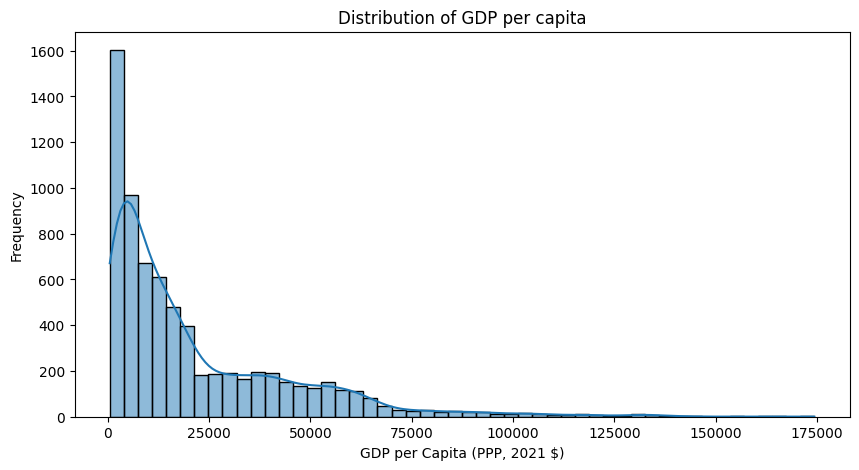

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(
    df['GDP per capita, PPP (constant 2021 international $)'], 
    bins=50, 
    kde=True
    )
plt.xlabel("GDP per Capita (PPP, 2021 $)")
plt.ylabel("Frequency")
plt.title("Distribution of GDP per capita")
plt.show()

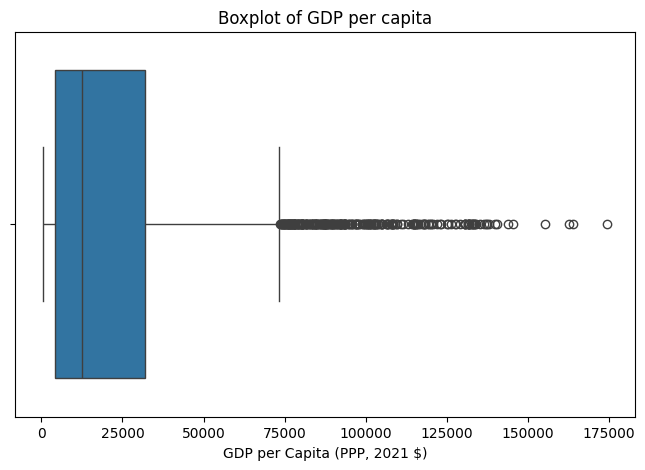

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x=df['GDP per capita, PPP (constant 2021 international $)']
    )
plt.xlabel("GDP per Capita (PPP, 2021 $)")
plt.title("Boxplot of GDP per capita")
plt.show()

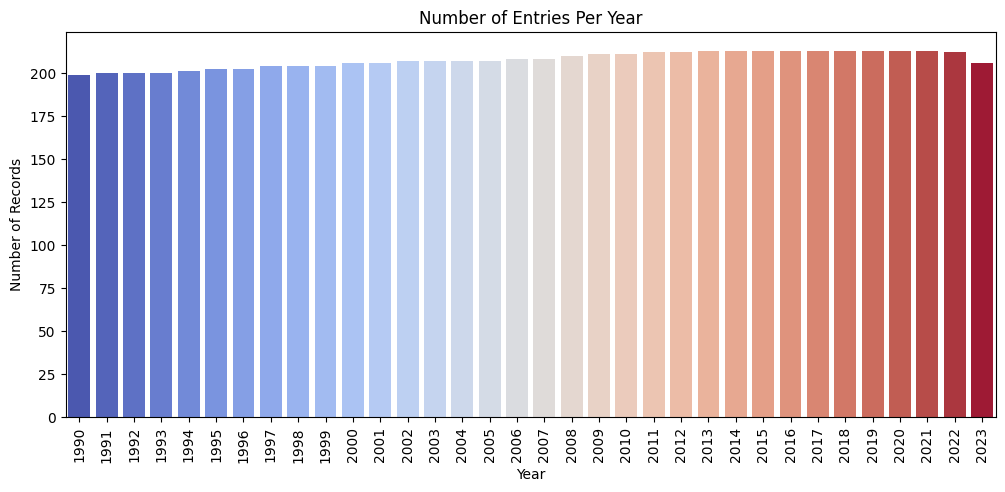

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(
    x="Year", 
    data=df, 
    palette="coolwarm", 
    hue='Year', 
    legend=False
    )
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title("Number of Entries Per Year")
plt.show()

In [33]:
Q1 = df['GDP per capita, PPP (constant 2021 international $)'].quantile(0.25)
Q3 = df['GDP per capita, PPP (constant 2021 international $)'].quantile(0.75)
print({
    "25th percentile" : Q1,
    "75th percentile" : Q3
    })

IQR = Q3-Q1
print(f"IQR : {IQR}")

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print({
    "lower bound" : lower_bound,
    "upper bound" : upper_bound
})

{'25th percentile': 4350.82495, '75th percentile': 31977.909}
IQR : 27627.084049999998
{'lower bound': -37089.80112499999, 'upper bound': 73418.53507499999}


In [40]:
outliers = df[(
    df['GDP per capita, PPP (constant 2021 international $)'] < lower_bound) |
    (df['GDP per capita, PPP (constant 2021 international $)'] > upper_bound
)]

print(f"total outliers : {len(outliers)}")

outliers.sort_values(by="GDP per capita, PPP (constant 2021 international $)", ascending=False).head(10)

total outliers : 267


Entity Code  Year  \
3766       Macao  MAC  2013   
3765       Macao  MAC  2012   
3767       Macao  MAC  2014   
3764       Macao  MAC  2011   
5215       Qatar  QAT  2011   
5216       Qatar  QAT  2012   
3726  Luxembourg  LUX  2007   
3771       Macao  MAC  2018   
3740  Luxembourg  LUX  2021   
3727  Luxembourg  LUX  2008   

      GDP per capita, PPP (constant 2021 international $)  
3766                                          174339.08    
3765                                          164065.11    
3767                                          162582.38    
3764                                          155185.39    
5215                                          145591.02    
5216                                          143830.70    
3726                                          140435.80    
3771                                          139787.78    
3740                                          137947.34    
3727                                          137533.73

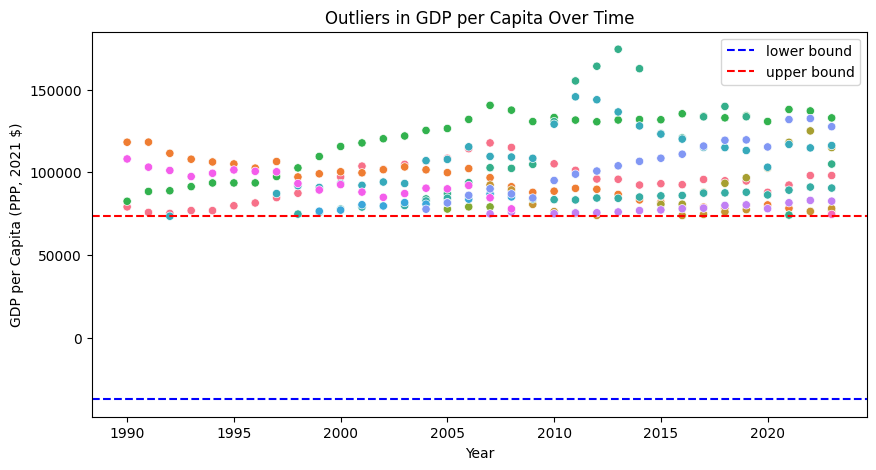

In [46]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=outliers, 
    x="Year", 
    y="GDP per capita, PPP (constant 2021 international $)",
    hue="Entity", 
    legend=False
    )
plt.axhline(
    lower_bound, 
    color="blue", 
    linestyle="--", 
    label="lower bound"
    )
plt.axhline(
    upper_bound, 
    color="red", 
    linestyle="--", 
    label="upper bound"
    )
plt.title("Outliers in GDP per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (PPP, 2021 $)")
plt.legend()
plt.show()

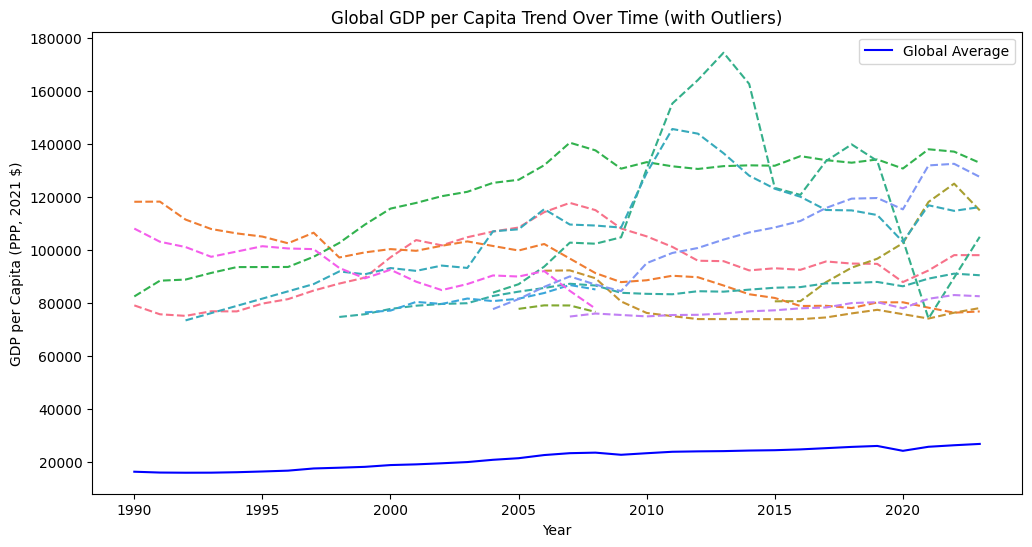

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="GDP per capita, PPP (constant 2021 international $)", estimator="mean", errorbar=None, color="blue", label="Global Average")
sns.lineplot(data=outliers, x="Year", y="GDP per capita, PPP (constant 2021 international $)", hue="Entity", linestyle="dashed", legend=False)
plt.title("Global GDP per Capita Trend Over Time (with Outliers)")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (PPP, 2021 $)")
plt.legend()
plt.show()

In [92]:
print(df.dtypes)

Entity                                                  object
Code                                                    object
Year                                                     int64
GDP per capita, PPP (constant 2021 international $)    float64
dtype: object


In [3]:
correlation = df['Year'].corr(df['GDP per capita, PPP (constant 2021 international $)'])
print(correlation)

0.1481101309615517


In [7]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print(corr_matrix)

                                                       Year  \
Year                                                1.00000   
GDP per capita, PPP (constant 2021 internationa...  0.14811   

                                                    GDP per capita, PPP (constant 2021 international $)  
Year                                                                                          0.14811    
GDP per capita, PPP (constant 2021 internationa...                                            1.00000    


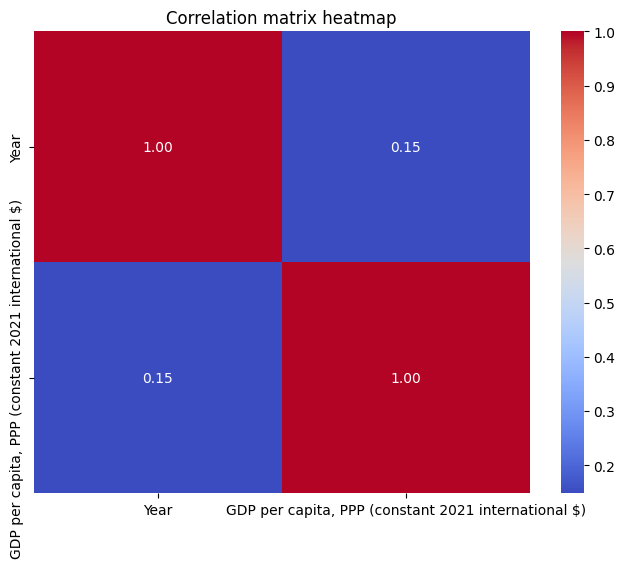

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix heatmap")
plt.show()

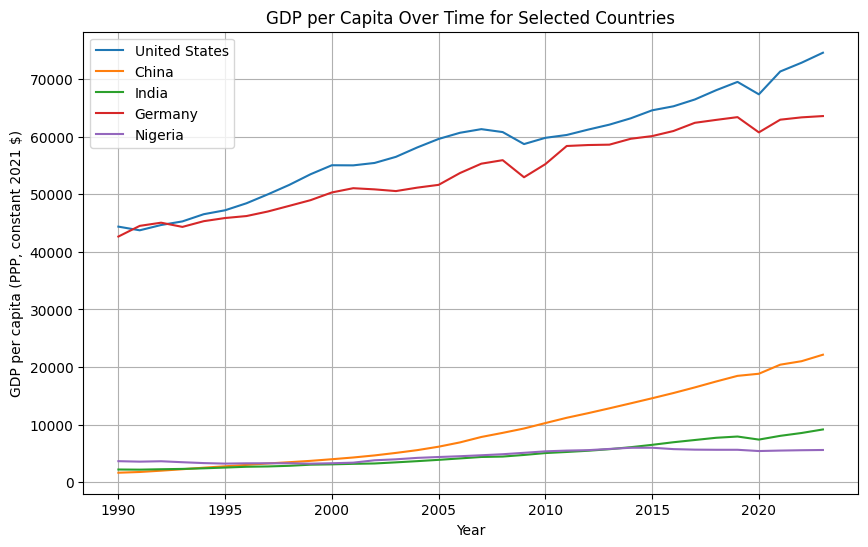

In [11]:
# List of selected countries
selected_countries = ["United States", "China", "India", "Germany", "Nigeria"]

# Filter data for selected countries
df_selected = df[df["Entity"].isin(selected_countries)]

# Plot GDP per capita over time
plt.figure(figsize=(10, 6))

for country in selected_countries:
    country_data = df_selected[df_selected["Entity"] == country]
    plt.plot(country_data["Year"], country_data["GDP per capita, PPP (constant 2021 international $)"], label=country)

plt.xlabel("Year")
plt.ylabel("GDP per capita (PPP, constant 2021 $)")
plt.title("GDP per Capita Over Time for Selected Countries")
plt.legend()
plt.grid(True)
plt.show()

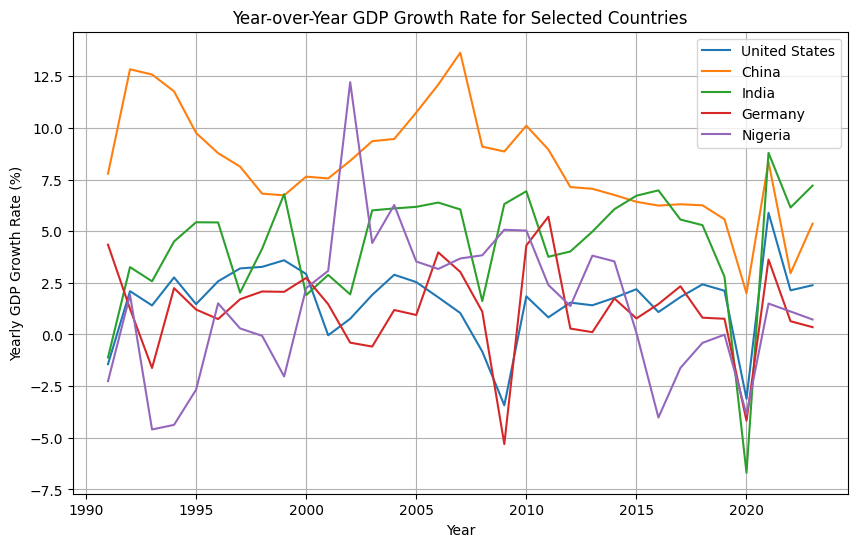

In [14]:
df_selected.loc[:, "GDP Growth Rate"] = df_selected.groupby("Entity")["GDP per capita, PPP (constant 2021 international $)"].pct_change() * 100

plt.figure(figsize=(10, 6))

for country in selected_countries:
    country_data = df_selected[df_selected["Entity"] == country]
    plt.plot(country_data["Year"], country_data["GDP Growth Rate"], label=country)

plt.xlabel("Year")
plt.ylabel("Yearly GDP Growth Rate (%)")
plt.title("Year-over-Year GDP Growth Rate for Selected Countries")
plt.legend()
plt.grid(True)
plt.show()